In [2]:
!pip install autokeras

    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 519.5MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5a298000 @  0x7fd7cbaf12a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 20.8MB/s 
    100% |████████████████████████████████| 12.2MB 2.6MB/s 
    100% |████████████████████████████████| 307kB 5.3MB/s 
    100% |████████████████████████████████| 51kB 21.2MB/s 
    100% |████████████████████████████████| 58.4MB 365kB/s 
    100% |████████████████████████████████| 61kB 21.3MB/s 
    100% |████████████████████████████████| 8.9MB 2.6MB/s 
    100% |████████████████████████████████| 2.0MB 4.7MB/s 
    100% |████████████████████████████████| 51kB 17.7MB/s 
    100%

In [0]:
import autokeras as ak

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [0]:
import numpy as np
import os
import glob

In [0]:
#os.listdir('drive/My Drive/Github/UrbanSound8K')

In [0]:
folders = os.listdir('drive/My Drive/Github/UrbanSound8K')
folders.sort()


classFolders = [folder for folder in folders if 'class' in folder]

imgsList = list()
classList = list()

for j in range(len(classFolders)):
    
    npyFileName = glob.glob('drive/My Drive/Github/UrbanSound8K' + '/' + classFolders[j] + '/' + '*.npy')

    print(npyFileName)
    
    imgs = np.load(npyFileName[0])

    imgsList.append(imgs)
    
    classList.append(j * np.ones(imgs.shape[0]))
    

['drive/My Drive/Github/UrbanSound8K/class00/class00.npy']
['drive/My Drive/Github/UrbanSound8K/class01/class01.npy']
['drive/My Drive/Github/UrbanSound8K/class02/class02.npy']
['drive/My Drive/Github/UrbanSound8K/class03/class03.npy']
['drive/My Drive/Github/UrbanSound8K/class04/class04.npy']
['drive/My Drive/Github/UrbanSound8K/class05/class05.npy']
['drive/My Drive/Github/UrbanSound8K/class06/class06.npy']
['drive/My Drive/Github/UrbanSound8K/class07/class07.npy']
['drive/My Drive/Github/UrbanSound8K/class08/class08.npy']
['drive/My Drive/Github/UrbanSound8K/class09/class09.npy']


In [0]:
for i in range(len(imgsList)):
    
    if i == 0:
        x_full = imgsList[i]
        y_full = classList[i]
    else:   
        x_full = np.vstack((x_full, imgsList[i]))
        y_full = np.concatenate((y_full, classList[i]))

    print('Stacked imgsList[{}] & classList[{}]'.format(i, i))

Stacked imgsList[0] & classList[0]
Stacked imgsList[1] & classList[1]
Stacked imgsList[2] & classList[2]
Stacked imgsList[3] & classList[3]
Stacked imgsList[4] & classList[4]
Stacked imgsList[5] & classList[5]
Stacked imgsList[6] & classList[6]
Stacked imgsList[7] & classList[7]
Stacked imgsList[8] & classList[8]
Stacked imgsList[9] & classList[9]


In [0]:
num = len(y_full)
trainNum = int(0.8 * num)
testNum = num - trainNum

randomIndex = np.random.permutation(num)
trainIndex = randomIndex[:trainNum]
trainIndex.sort()
testIndex = randomIndex[trainNum:]
testIndex.sort()

In [0]:
y_train = y_full[trainIndex]
y_test = y_full[testIndex]
x_train = x_full[trainIndex]
x_test = x_full[testIndex]

del x_full

In [0]:
num_classes = 10

img_rows = 224
img_cols = 224

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [0]:
import matplotlib.pyplot as plt

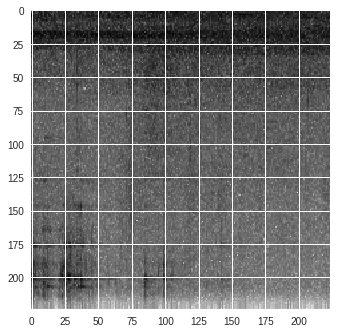

In [0]:
plt.imshow(x_train[4590, :, :, 0])

In [0]:
localMean = np.zeros(x_train.shape[0])
localStd = np.zeros(x_train.shape[0])

for i in range(x_train.shape[0]):
    localMean[i] = np.mean(x_train[i, :, :, 0])
    localStd[i] = np.std(x_train[i, :, :, 0])

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


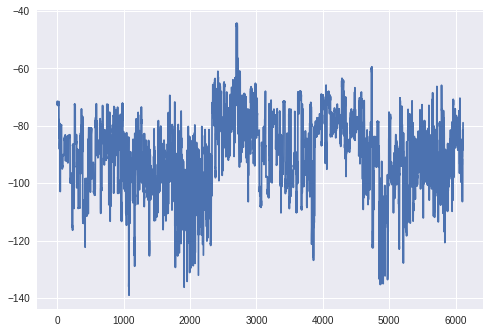

In [0]:
plt.plot(localMean)
valid_Idx = localMean != float("-inf")
globalMean = np.nanmean(localMean[valid_Idx])

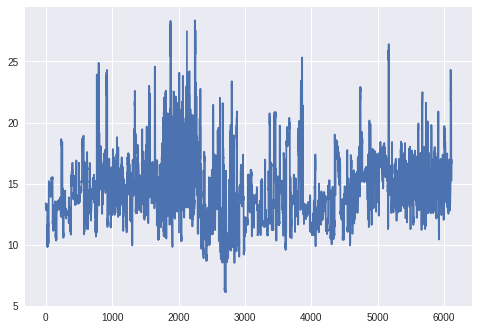

In [0]:
plt.plot(localStd)
valid_Idx = (localStd != float("nan")) & (localStd != float("-inf")) & (localStd != float("inf"))
globalStd = np.nanmedian(localStd[valid_Idx])

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = (x_train - globalMean)/globalStd
x_test = (x_test - globalMean)/globalStd
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Duplicate data here
x_train_dup = np.stack([x_train[:, :, :, 0], x_train[:, :, :, 0], x_train[:, :, :, 0]], axis = -1)

del x_train

x_test_dup = np.stack([x_test[:, :, :, 0], x_test[:, :, :, 0], x_test[:, :, :, 0]], axis = -1)

del x_test

x_train shape: (6112, 224, 224, 1)
6112 train samples
1528 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adadelta(),
#               metrics=['accuracy'])

In [0]:
from keras.applications.xception import Xception
from keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from keras.models import Sequential
from keras import backend as K
from keras.applications import VGG16

imgSize = 224

K.clear_session()
input_tensor = Input(shape=(imgSize, imgSize, 3))

model = Sequential()

# modelWoTop = Xception(input_tensor=input_tensor, weights='imagenet', include_top=False)
# model.add(modelWoTop)
# model.add(GlobalAveragePooling2D())
# # model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

modelWoTop = VGG16(input_tensor=input_tensor, weights='imagenet', include_top=False)
model.add(modelWoTop)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print('Compiling Pretrained {} Model'.format(model.layers[0].name))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Compiling Pretrained vgg16 Model


In [0]:
batch_size = 1
epochs = 3

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(batch_size, epochs))

model.fit(x_train_dup, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_dup, y_test))

Training Pretrained vgg16 Model
Batch Size: 1	 Epochs: 3	

Train on 6112 samples, validate on 1528 samples
Epoch 1/3
6112/6112 [==============================] - 1453s 238ms/step - loss: 14.0458 - acc: 0.1284 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 2/3
6112/6112 [==============================] - 1443s 236ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 3/3
6112/6112 [==============================] - 1443s 236ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394


In [0]:
batch_size = 4
epochs = 20

print('Training Pretrained {} Model'.format(model.layers[0].name))
print('Batch Size: {}\t Epochs: {}\t\n'.format(batch_size, epochs))

model.fit(x_train_dup, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_dup, y_test))

Training Pretrained vgg16 Model
Batch Size: 4	 Epochs: 20	

Train on 6112 samples, validate on 1528 samples
Epoch 1/20
6112/6112 [==============================] - 556s 91ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 2/20
6112/6112 [==============================] - 554s 91ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 3/20
6112/6112 [==============================] - 555s 91ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 4/20
6112/6112 [==============================] - 555s 91ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 5/20
6112/6112 [==============================] - 555s 91ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 6/20
6112/6112 [==============================] - 555s 91ms/step - loss: 14.0453 - acc: 0.1286 - val_loss: 13.8713 - val_acc: 0.1394
Epoch 7/20
6112/6112 [==============================] - 55

KeyboardInterrupt: ignored

In [0]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [0]:
y_pred = model.predict(x_test_dup)

In [0]:
y_pred

In [0]:
np.argmax(y_pred, axis=-1)

In [0]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, y_pred)



In [0]:
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))
# score = model.evaluate(x_test, y_test, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])